# In this notebook I will build a logistic regression model on pairs.csv

In [1]:
import pandas as pd
import numpy as np
import string
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

In [2]:
pairs = pd.read_csv(r'C:\Users\gorma\OneDrive\Documents\Erdos\foursquare-location-matching\data_raw\pairs.csv')

In [3]:
pairs.head()

,id_1,name_1,latitude_1,longitude_1,address_1,city_1,state_1,zip_1,country_1,url_1,...,longitude_2,address_2,city_2,state_2,zip_2,country_2,url_2,phone_2,categories_2,match
0,E_000001272c6c5d,Café Stad Oudenaarde,50.859975,3.634196,Abdijstraat,Nederename,Oost-Vlaanderen,9700,BE,NaN,...,3.635206,NaN,NaN,NaN,NaN,BE,NaN,NaN,Bars,True
1,E_000008a8ba4f48,Turkcell,37.844510,27.844202,Adnan Menderes Bulvarı,NaN,NaN,NaN,TR,NaN,...,27.845560,batı aydın,aydın,NaN,67500,TR,NaN,NaN,Electronics Stores,False
2,E_000023d8f4be44,Island Spa,14.518970,121.018702,"5th Flr, Newport Mall, Resorts World Manila",Pasay City,Metro Manila,NaN,PH,NaN,...,121.019827,NaN,NaN,NaN,NaN,PH,NaN,NaN,Spas,True
3,E_00007dcd2bb53f,TOGO'S Sandwiches,38.257797,-122.064599,"1380 Holiday Ln., Ste. B",Fairfield,CA,94534,US,https://locations.togos.com/ll/US/CA/Fairfield...,...,-122.064606,NaN,Fairfield,CA,NaN,US,NaN,NaN,Sandwich Places,True
4,E_0000c362229d93,Coffee Cat,7.082218,125.610244,F. Torres St.,Davao City,Davao Region,8000,PH,NaN,...,125.611457,E. Jacinto Extension,Davao City,Davao Region,8000,PH,NaN,NaN,"Coffee Shops, Cafés, Dessert Shops",False


First I'm going to replace empty string cells with empty strings ""

In [4]:
pairs.dtypes

id_1             object
name_1           object
latitude_1      float64
longitude_1     float64
address_1        object
city_1           object
state_1          object
zip_1            object
country_1        object
url_1            object
phone_1          object
categories_1     object
id_2             object
name_2           object
latitude_2      float64
longitude_2     float64
address_2        object
city_2           object
state_2          object
zip_2            object
country_2        object
url_2            object
phone_2          object
categories_2     object
match              bool
dtype: object

In [5]:
pairs['address_1'].fillna('') + pairs['city_1'].fillna('') 

0                                     AbdijstraatNederename
1                                    Adnan Menderes Bulvarı
2         5th Flr, Newport Mall, Resorts World ManilaPas...
3                         1380 Holiday Ln., Ste. BFairfield
4                                   F. Torres St.Davao City
                                ...                        
578902                           332 Hougang Ave 5Singapore
578903                          Fawsley Nr DaventryDaventry
578904                      825C Murfreesboro PikeNashville
578905                                        上野6-13-6Taitō
578906                                          Waihi Beach
Length: 578907, dtype: object

## Making combined full addresses

In [6]:
pairs[pairs['categories_1'].isna()]

,id_1,name_1,latitude_1,longitude_1,address_1,city_1,state_1,zip_1,country_1,url_1,...,longitude_2,address_2,city_2,state_2,zip_2,country_2,url_2,phone_2,categories_2,match
171,E_0019ff090d2ccd,Albert Paul's Salon,30.204673,-81.381986,NaN,NaN,NaN,NaN,US,NaN,...,-81.382532,520 Sawgrass Village Dr,Ponte Vedra Beach,FL,32082,US,NaN,NaN,Laundry Services,False
255,E_0024fc2bd72ad5,F45,-6.937530,107.712388,NaN,NaN,NaN,NaN,ID,NaN,...,107.712388,NaN,NaN,NaN,NaN,ID,NaN,NaN,NaN,True
258,E_002586c2fc89a5,Ruang Sidang 3 Fakultas Geografi,-7.778538,110.377190,NaN,NaN,NaN,NaN,ID,NaN,...,110.377190,NaN,NaN,NaN,NaN,ID,NaN,NaN,NaN,True
345,E_002d10534e16e6,Soltex Chile S.A.,-33.355660,-70.695412,Victor Uribe 2260,Santiago,Chile,8710022,CL,NaN,...,-70.695473,Soltex Chile S.A.,Santiago,Región Metropolitana,NaN,CL,NaN,NaN,Cafeterias,False
348,E_002d6e7f826419,ตลาดสดเทศบาลเมืองสระบุรี,14.527911,100.914027,NaN,Pak Prieo,Saraburi,NaN,TH,NaN,...,100.914314,Phichai Narong Songkhram 12,Saraburi,Changwat Sara Buri,18000,TH,NaN,NaN,"Flea Markets, Farmers Markets",False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578735,E_ffe7db3068f87d,SESC BEC,-6.907660,107.608724,Jl. Purnawarman,Bandung,Jawa Barat,NaN,ID,NaN,...,107.615732,"BEC, UG",Bandung,Jawa Barat,40171,ID,NaN,NaN,Mobile Phone Shops,False
578736,E_ffe7db3068f87d,SESC BEC,-6.907660,107.608724,Jl. Purnawarman,Bandung,Jawa Barat,NaN,ID,NaN,...,107.609335,Jl. Purnawarman,Bandung,Indonesia,NaN,ID,NaN,NaN,Food Trucks,False
578737,E_ffe7db3068f87d,SESC BEC,-6.907660,107.608724,Jl. Purnawarman,Bandung,Jawa Barat,NaN,ID,NaN,...,107.609125,"Istana BEC, LG A-02",Bandung,Jawa Barat,40117,ID,http://erafone.com,NaN,Electronics Stores,False
578744,E_ffe886f07d339c,Operating Room Cicendo Eye Hospital,-6.912702,107.603814,Jl.Cicendo no.4,Bandung,Indonesia,NaN,ID,NaN,...,107.608131,Jl.Cicendo no.4,Bandung,West Java,NaN,ID,NaN,NaN,NaN,False


In [7]:
pairs['categories_1'] = pairs['categories_1'].fillna('')
pairs['categories_2'] = pairs['categories_2'].fillna('')

In [8]:
pairs[pairs['categories_1'].isna()]

,id_1,name_1,latitude_1,longitude_1,address_1,city_1,state_1,zip_1,country_1,url_1,...,longitude_2,address_2,city_2,state_2,zip_2,country_2,url_2,phone_2,categories_2,match


In [9]:
pairs['full_address_1'] = pairs['address_1'].fillna('') + ' ' + pairs['city_1'].fillna('') + ' ' + pairs['state_1'].fillna('') + ' ' + pairs['zip_1'].fillna('')  + ' ' + pairs['country_1'].fillna('')

In [10]:
pairs['full_address_1'].head()

0       Abdijstraat Nederename Oost-Vlaanderen 9700 BE
1                         Adnan Menderes Bulvarı    TR
2    5th Flr, Newport Mall, Resorts World Manila Pa...
3       1380 Holiday Ln., Ste. B Fairfield CA 94534 US
4        F. Torres St. Davao City Davao Region 8000 PH
Name: full_address_1, dtype: object

In [11]:
pairs['full_address_2'] = pairs['address_2'].fillna('') + ' ' + pairs['city_2'].fillna('') + ' ' + pairs['state_2'].fillna('') + ' ' + pairs['zip_2'].fillna('')  + ' ' + pairs['country_2'].fillna('')

In [12]:
pairs['full_address_2'].head()

0                                                   BE
1                           batı aydın aydın  67500 TR
2                                                   PH
3                                     Fairfield CA  US
4    E. Jacinto Extension Davao City Davao Region 8...
Name: full_address_2, dtype: object

In [13]:
pairs_combined = pairs.drop(['address_1', 'city_1', 'state_1', 'zip_1', 'address_2', 'city_2', 'state_2', 'zip_2'], axis = 1)

In [14]:
pairs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 578907 entries, 0 to 578906
Data columns (total 27 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id_1            578907 non-null  object 
 1   name_1          578907 non-null  object 
 2   latitude_1      578907 non-null  float64
 3   longitude_1     578907 non-null  float64
 4   address_1       475383 non-null  object 
 5   city_1          512928 non-null  object 
 6   state_1         452316 non-null  object 
 7   zip_1           359509 non-null  object 
 8   country_1       578899 non-null  object 
 9   url_1           231806 non-null  object 
 10  phone_1         270022 non-null  object 
 11  categories_1    578907 non-null  object 
 12  id_2            578907 non-null  object 
 13  name_2          578907 non-null  object 
 14  latitude_2      578907 non-null  float64
 15  longitude_2     578907 non-null  float64
 16  address_2       312497 non-null  object 
 17  city_2    

In [15]:
pairs_combined.head()

,id_1,name_1,latitude_1,longitude_1,country_1,url_1,phone_1,categories_1,id_2,name_2,latitude_2,longitude_2,country_2,url_2,phone_2,categories_2,match,full_address_1,full_address_2
0,E_000001272c6c5d,Café Stad Oudenaarde,50.859975,3.634196,BE,NaN,NaN,Bars,E_da7fa3963561f8,Café Oudenaarde,50.869358,3.635206,BE,NaN,NaN,Bars,True,Abdijstraat Nederename Oost-Vlaanderen 9700 BE,BE
1,E_000008a8ba4f48,Turkcell,37.844510,27.844202,TR,NaN,NaN,Mobile Phone Shops,E_3f12df0b045062,Turkcell,37.838020,27.845560,TR,NaN,NaN,Electronics Stores,False,Adnan Menderes Bulvarı TR,batı aydın aydın 67500 TR
2,E_000023d8f4be44,Island Spa,14.518970,121.018702,PH,NaN,NaN,Spas,E_12453effe251db,Island Spa Theater,14.518330,121.019827,PH,NaN,NaN,Spas,True,"5th Flr, Newport Mall, Resorts World Manila Pa...",PH
3,E_00007dcd2bb53f,TOGO'S Sandwiches,38.257797,-122.064599,US,https://locations.togos.com/ll/US/CA/Fairfield...,7074394747,Sandwich Places,E_f131dcb7f07be9,Togo's,38.257938,-122.064606,US,NaN,NaN,Sandwich Places,True,"1380 Holiday Ln., Ste. B Fairfield CA 94534 US",Fairfield CA US
4,E_0000c362229d93,Coffee Cat,7.082218,125.610244,PH,NaN,NaN,"Cafés, Coffee Shops",E_d52c3c4d53831c,Coffeecat,7.076016,125.611457,PH,NaN,NaN,"Coffee Shops, Cafés, Dessert Shops",False,F. Torres St. Davao City Davao Region 8000 PH,E. Jacinto Extension Davao City Davao Region 8...


## Reducing to only columns that seems useful. (mostly based on shear amount of nans)

In [16]:
column_list = ['id_1','name_1', 'latitude_1', 'longitude_1', 'country_1', 'full_address_1', 'categories_1', 'id_2','name_2', 'latitude_2', 'longitude_2', 'country_2', 'full_address_2', 'categories_2', 'match']

In [17]:
pairs_reduced = pairs[column_list]

In [18]:
pairs_reduced.head()

,id_1,name_1,latitude_1,longitude_1,country_1,full_address_1,categories_1,id_2,name_2,latitude_2,longitude_2,country_2,full_address_2,categories_2,match
0,E_000001272c6c5d,Café Stad Oudenaarde,50.859975,3.634196,BE,Abdijstraat Nederename Oost-Vlaanderen 9700 BE,Bars,E_da7fa3963561f8,Café Oudenaarde,50.869358,3.635206,BE,BE,Bars,True
1,E_000008a8ba4f48,Turkcell,37.844510,27.844202,TR,Adnan Menderes Bulvarı TR,Mobile Phone Shops,E_3f12df0b045062,Turkcell,37.838020,27.845560,TR,batı aydın aydın 67500 TR,Electronics Stores,False
2,E_000023d8f4be44,Island Spa,14.518970,121.018702,PH,"5th Flr, Newport Mall, Resorts World Manila Pa...",Spas,E_12453effe251db,Island Spa Theater,14.518330,121.019827,PH,PH,Spas,True
3,E_00007dcd2bb53f,TOGO'S Sandwiches,38.257797,-122.064599,US,"1380 Holiday Ln., Ste. B Fairfield CA 94534 US",Sandwich Places,E_f131dcb7f07be9,Togo's,38.257938,-122.064606,US,Fairfield CA US,Sandwich Places,True
4,E_0000c362229d93,Coffee Cat,7.082218,125.610244,PH,F. Torres St. Davao City Davao Region 8000 PH,"Cafés, Coffee Shops",E_d52c3c4d53831c,Coffeecat,7.076016,125.611457,PH,E. Jacinto Extension Davao City Davao Region 8...,"Coffee Shops, Cafés, Dessert Shops",False


In [19]:
pairs_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 578907 entries, 0 to 578906
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id_1            578907 non-null  object 
 1   name_1          578907 non-null  object 
 2   latitude_1      578907 non-null  float64
 3   longitude_1     578907 non-null  float64
 4   country_1       578899 non-null  object 
 5   full_address_1  578907 non-null  object 
 6   categories_1    578907 non-null  object 
 7   id_2            578907 non-null  object 
 8   name_2          578907 non-null  object 
 9   latitude_2      578907 non-null  float64
 10  longitude_2     578907 non-null  float64
 11  country_2       578901 non-null  object 
 12  full_address_2  578907 non-null  object 
 13  categories_2    578907 non-null  object 
 14  match           578907 non-null  bool   
dtypes: bool(1), float64(4), object(10)
memory usage: 62.4+ MB


## Calculating angular difference

In [20]:
# pairs_reduced['theta_diff'] = np.arccos(np.sin(np.radians(pairs_reduced['latitude_1']))*np.sin(np.radians(pairs_reduced['latitude_2']))+
#                                        np.cos(np.radians(pairs_reduced['latitude_1']))*np.cos(np.radians(pairs_reduced['latitude_2']))*
#                                         np.cos(np.radians(pairs_reduced['longitude_1']-pairs_reduced['longitude_2']))
#                                        )

In [21]:
pairs_reduced['theta_diff'] = np.abs(np.arctan(np.sqrt(
    (np.cos(np.radians(pairs_reduced['latitude_2']))*np.sin(np.radians(pairs_reduced['longitude_1']-pairs_reduced['longitude_2'])))**2 +
        (np.cos(np.radians(pairs_reduced['latitude_1']))*np.sin(np.radians(pairs_reduced['latitude_2']))-
            np.sin(np.radians(pairs_reduced['latitude_1']))*np.cos(np.radians(pairs_reduced['latitude_2']))*np.cos(np.radians(pairs_reduced['longitude_1']-pairs_reduced['longitude_2'])))**2
                                                )/
    (np.sin(np.radians(pairs_reduced['latitude_1']))*np.sin(np.radians(pairs_reduced['latitude_2']))+
        np.cos(np.radians(pairs_reduced['latitude_1']))*np.cos(np.radians(pairs_reduced['latitude_2']))*np.cos(np.radians(pairs_reduced['longitude_1']-pairs_reduced['longitude_2']))
    )
                                               )
                                      )

<ipython-input-21-4562924af0b8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pairs_reduced['theta_diff'] = np.abs(np.arctan(np.sqrt(


In [22]:
# pairs_reduced['theta_diff'] = np.sqrt((np.radians(pairs_reduced['longitude_1'])-np.radians(pairs_reduced['longitude_2'])*np.cos(np.radians(pairs_reduced['latitude_1'])))**2 +
#         (np.radians(pairs_reduced['latitude_1'])-np.radians(pairs_reduced['latitude_2']))**2
#        )

In [23]:
# pairs_reduced['theta_diff'] = (np.radians(pairs_reduced['longitude_1'])-np.radians(pairs_reduced['longitude_2']))**2 + (np.radians(pairs_reduced['latitude_1'])-np.radians(pairs_reduced['latitude_2']))**2

In [24]:
pairs_reduced[pairs_reduced['theta_diff'].isna()]

,id_1,name_1,latitude_1,longitude_1,country_1,full_address_1,categories_1,id_2,name_2,latitude_2,longitude_2,country_2,full_address_2,categories_2,match,theta_diff


## Reducing to only US data

In [25]:
len(pairs_reduced[(pairs_reduced['country_1'] == 'US') & (pairs_reduced['country_1'] == 'US')])

117793

Dropping no longer needed columns

In [26]:
pairs_red_us = pairs_reduced[(pairs_reduced['country_1'] == 'US') & (pairs_reduced['country_1'] == 'US')]

In [27]:
pairs_red_us = pairs_red_us.drop(['country_1','country_2', 'latitude_1', 'longitude_1', 'latitude_2', 'longitude_2'], axis = 1)

In [28]:
pairs_red_us.head()

,id_1,name_1,full_address_1,categories_1,id_2,name_2,full_address_2,categories_2,match,theta_diff
3,E_00007dcd2bb53f,TOGO'S Sandwiches,"1380 Holiday Ln., Ste. B Fairfield CA 94534 US",Sandwich Places,E_f131dcb7f07be9,Togo's,Fairfield CA US,Sandwich Places,True,0.000002
6,E_0000d9e584ed9f,Signature Properties Savannah,100 Commercial Ct Ste C Savannah GA 31406 US,Real Estate Offices,E_caad79f6ed7c44,Signature Properties Savannah,7014 Abercorn St Savannah GA 31406 US,,True,0.000082
7,E_00011cca3f0bd6,Inner Workings,Serving General Area Santa Fe NM 87501 US,Massage Studios,E_aeffddf31a4b9e,Inner Workings,Serving General Area Santa Fe NM 87501 US,Massage Studios,True,0.000019
8,E_00015cd7e0227f,Lake Destiny,Maitland FL 32751 US,Lakes,E_7250ab441d9d42,Lake destiny field,Maitland FL 32751 US,Soccer Fields,False,0.000253
11,E_0001a397f67ad5,Dale City Truck-Only Safety Rest Area North,Interstate 95 North Montclair VA 22026 US,Rest Areas,E_4b83e498f06eff,I-95 Exit 152 Truck Stop,Dumfries VA 22026 US,Rest Areas,True,0.000119


It's probably in my best interest to lower case all of the strings when doing the string matching aspect

In [29]:
pairs_red_us['name_1'] = pairs_red_us['name_1'].astype(str)
pairs_red_us['name_2'] = pairs_red_us['name_2'].astype(str)
pairs_red_us['full_address_1'] = pairs_red_us['full_address_1'].astype(str)
pairs_red_us['full_address_2'] = pairs_red_us['full_address_2'].astype(str)
pairs_red_us['categories_1'] = pairs_red_us['categories_1'].astype(str)
pairs_red_us['categories_2'] = pairs_red_us['categories_2'].astype(str)

pairs_red_us['name_1'] = pairs_red_us['name_1'].str.lower()
pairs_red_us['full_address_1'] = pairs_red_us['full_address_1'].str.lower()
pairs_red_us['categories_1'] = pairs_red_us['categories_1'].str.lower()
pairs_red_us['name_2'] = pairs_red_us['name_2'].str.lower()
pairs_red_us['full_address_2'] = pairs_red_us['full_address_2'].str.lower()
pairs_red_us['categories_2'] = pairs_red_us['categories_2'].str.lower()

In [30]:
pairs_red_us.head()

,id_1,name_1,full_address_1,categories_1,id_2,name_2,full_address_2,categories_2,match,theta_diff
3,E_00007dcd2bb53f,togo's sandwiches,"1380 holiday ln., ste. b fairfield ca 94534 us",sandwich places,E_f131dcb7f07be9,togo's,fairfield ca us,sandwich places,True,0.000002
6,E_0000d9e584ed9f,signature properties savannah,100 commercial ct ste c savannah ga 31406 us,real estate offices,E_caad79f6ed7c44,signature properties savannah,7014 abercorn st savannah ga 31406 us,,True,0.000082
7,E_00011cca3f0bd6,inner workings,serving general area santa fe nm 87501 us,massage studios,E_aeffddf31a4b9e,inner workings,serving general area santa fe nm 87501 us,massage studios,True,0.000019
8,E_00015cd7e0227f,lake destiny,maitland fl 32751 us,lakes,E_7250ab441d9d42,lake destiny field,maitland fl 32751 us,soccer fields,False,0.000253
11,E_0001a397f67ad5,dale city truck-only safety rest area north,interstate 95 north montclair va 22026 us,rest areas,E_4b83e498f06eff,i-95 exit 152 truck stop,dumfries va 22026 us,rest areas,True,0.000119


I tihnk I can drop ids as well

In [31]:
pairs_red_us = pairs_red_us.drop(['id_1', 'id_2'], axis = 1)

In [32]:
pairs_red_us.head()

,name_1,full_address_1,categories_1,name_2,full_address_2,categories_2,match,theta_diff
3,togo's sandwiches,"1380 holiday ln., ste. b fairfield ca 94534 us",sandwich places,togo's,fairfield ca us,sandwich places,True,0.000002
6,signature properties savannah,100 commercial ct ste c savannah ga 31406 us,real estate offices,signature properties savannah,7014 abercorn st savannah ga 31406 us,,True,0.000082
7,inner workings,serving general area santa fe nm 87501 us,massage studios,inner workings,serving general area santa fe nm 87501 us,massage studios,True,0.000019
8,lake destiny,maitland fl 32751 us,lakes,lake destiny field,maitland fl 32751 us,soccer fields,False,0.000253
11,dale city truck-only safety rest area north,interstate 95 north montclair va 22026 us,rest areas,i-95 exit 152 truck stop,dumfries va 22026 us,rest areas,True,0.000119


Now following the article "Calculating STring Similarity in Python"

In [33]:
pairs_red_us['name_1']

3                                   togo's sandwiches
6                       signature properties savannah
7                                      inner workings
8                                        lake destiny
11        dale city truck-only safety rest area north
                             ...                     
578885                                        talbots
578888                                    bank street
578890                             signature plumbing
578900                                      walgreens
578904           cricket wireless authorized retailer
Name: name_1, Length: 117793, dtype: object

In [34]:
pairs_red_us['name_1'] = pairs_red_us['name_1'].str.replace('[{}]'.format(string.punctuation),'')
pairs_red_us['name_2'] = pairs_red_us['name_2'].str.replace('[{}]'.format(string.punctuation),'')
pairs_red_us['full_address_1'] = pairs_red_us['full_address_1'].str.replace('[{}]'.format(string.punctuation),'')
pairs_red_us['full_address_2'] = pairs_red_us['full_address_2'].str.replace('[{}]'.format(string.punctuation),'')
pairs_red_us['categories_1'] = pairs_red_us['categories_1'].str.replace('[{}]'.format(string.punctuation),'')
pairs_red_us['categories_2'] = pairs_red_us['categories_2'].str.replace('[{}]'.format(string.punctuation),'')

In [35]:
pairs_red_us['name_1'].iloc[0]

'togos sandwiches'

In [36]:
pairs_red_us.head()

,name_1,full_address_1,categories_1,name_2,full_address_2,categories_2,match,theta_diff
3,togos sandwiches,1380 holiday ln ste b fairfield ca 94534 us,sandwich places,togos,fairfield ca us,sandwich places,True,0.000002
6,signature properties savannah,100 commercial ct ste c savannah ga 31406 us,real estate offices,signature properties savannah,7014 abercorn st savannah ga 31406 us,,True,0.000082
7,inner workings,serving general area santa fe nm 87501 us,massage studios,inner workings,serving general area santa fe nm 87501 us,massage studios,True,0.000019
8,lake destiny,maitland fl 32751 us,lakes,lake destiny field,maitland fl 32751 us,soccer fields,False,0.000253
11,dale city truckonly safety rest area north,interstate 95 north montclair va 22026 us,rest areas,i95 exit 152 truck stop,dumfries va 22026 us,rest areas,True,0.000119


In [37]:
pairs_red_us = pairs_red_us.reset_index().drop('index', axis = 1)

In [38]:
pairs_red_us.head()

,name_1,full_address_1,categories_1,name_2,full_address_2,categories_2,match,theta_diff
0,togos sandwiches,1380 holiday ln ste b fairfield ca 94534 us,sandwich places,togos,fairfield ca us,sandwich places,True,0.000002
1,signature properties savannah,100 commercial ct ste c savannah ga 31406 us,real estate offices,signature properties savannah,7014 abercorn st savannah ga 31406 us,,True,0.000082
2,inner workings,serving general area santa fe nm 87501 us,massage studios,inner workings,serving general area santa fe nm 87501 us,massage studios,True,0.000019
3,lake destiny,maitland fl 32751 us,lakes,lake destiny field,maitland fl 32751 us,soccer fields,False,0.000253
4,dale city truckonly safety rest area north,interstate 95 north montclair va 22026 us,rest areas,i95 exit 152 truck stop,dumfries va 22026 us,rest areas,True,0.000119


In [39]:
pairs_red_us.to_csv(r'C:\Users\gorma\OneDrive\Documents\Erdos\foursquare-location-matching\tim_code\working_data\pairs_reduced_us.csv')

In [40]:
vectors = CountVectorizer().fit_transform([pairs_red_us['name_1'].iloc[0], pairs_red_us['name_2'].iloc[0]]).toarray()

In [41]:
csim = cosine_similarity(vectors)

In [42]:
csim

array([[1.        , 0.70710678],
       [0.70710678, 1.        ]])

In [43]:
csim[0][1]

0.7071067811865475

In [44]:
range(len(pairs_red_us.iloc[:]))

range(0, 117793)

In [45]:
name_cosines = []
for i in range(len(pairs_red_us)):
    if (pairs_red_us['name_1'].iloc[i] == '') | (pairs_red_us['name_2'].iloc[i] == ''):
        csim = -1
    else:
        csim = cosine_similarity(CountVectorizer().fit_transform([pairs_red_us['name_1'].iloc[i], pairs_red_us['name_2'].iloc[i]]).toarray())[0][1]
    name_cosines.append(csim)

In [46]:
len(name_cosines)

117793

In [47]:
pairs_red_us['name_cosines'] = pd.DataFrame(name_cosines)

In [48]:
pairs_red_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117793 entries, 0 to 117792
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   name_1          117793 non-null  object 
 1   full_address_1  117793 non-null  object 
 2   categories_1    117793 non-null  object 
 3   name_2          117793 non-null  object 
 4   full_address_2  117793 non-null  object 
 5   categories_2    117793 non-null  object 
 6   match           117793 non-null  bool   
 7   theta_diff      117793 non-null  float64
 8   name_cosines    117793 non-null  float64
dtypes: bool(1), float64(2), object(6)
memory usage: 7.3+ MB


In [49]:
pairs_red_us[pairs_red_us['name_cosines'].isna()]

,name_1,full_address_1,categories_1,name_2,full_address_2,categories_2,match,theta_diff,name_cosines


In [50]:
pairs_red_us[pairs_red_us['categories_2'].isna()]

,name_1,full_address_1,categories_1,name_2,full_address_2,categories_2,match,theta_diff,name_cosines


In [51]:
pairs_red_us.head()

,name_1,full_address_1,categories_1,name_2,full_address_2,categories_2,match,theta_diff,name_cosines
0,togos sandwiches,1380 holiday ln ste b fairfield ca 94534 us,sandwich places,togos,fairfield ca us,sandwich places,True,0.000002,0.707107
1,signature properties savannah,100 commercial ct ste c savannah ga 31406 us,real estate offices,signature properties savannah,7014 abercorn st savannah ga 31406 us,,True,0.000082,1.000000
2,inner workings,serving general area santa fe nm 87501 us,massage studios,inner workings,serving general area santa fe nm 87501 us,massage studios,True,0.000019,1.000000
3,lake destiny,maitland fl 32751 us,lakes,lake destiny field,maitland fl 32751 us,soccer fields,False,0.000253,0.816497
4,dale city truckonly safety rest area north,interstate 95 north montclair va 22026 us,rest areas,i95 exit 152 truck stop,dumfries va 22026 us,rest areas,True,0.000119,0.000000


In [52]:
address_cosines = []
for i in range(len(pairs_red_us)):
    if (pairs_red_us['full_address_1'].iloc[i] == '') | (pairs_red_us['full_address_2'].iloc[i] == ''):
        csim = -1
    else:
        csim = cosine_similarity(CountVectorizer().fit_transform([pairs_red_us['full_address_1'].iloc[i], pairs_red_us['full_address_2'].iloc[i]]).toarray())[0][1]
    address_cosines.append(csim)

pairs_red_us['full_address_cosines'] = pd.DataFrame(address_cosines)

In [53]:
pairs_red_us.head()

,name_1,full_address_1,categories_1,name_2,full_address_2,categories_2,match,theta_diff,name_cosines,full_address_cosines
0,togos sandwiches,1380 holiday ln ste b fairfield ca 94534 us,sandwich places,togos,fairfield ca us,sandwich places,True,0.000002,0.707107,0.612372
1,signature properties savannah,100 commercial ct ste c savannah ga 31406 us,real estate offices,signature properties savannah,7014 abercorn st savannah ga 31406 us,,True,0.000082,1.000000,0.534522
2,inner workings,serving general area santa fe nm 87501 us,massage studios,inner workings,serving general area santa fe nm 87501 us,massage studios,True,0.000019,1.000000,1.000000
3,lake destiny,maitland fl 32751 us,lakes,lake destiny field,maitland fl 32751 us,soccer fields,False,0.000253,0.816497,1.000000
4,dale city truckonly safety rest area north,interstate 95 north montclair va 22026 us,rest areas,i95 exit 152 truck stop,dumfries va 22026 us,rest areas,True,0.000119,0.000000,0.566947


In [54]:
categories_cosines = []
for i in range(len(pairs_red_us)):
    if (pairs_red_us['categories_1'].iloc[i] == '') | (pairs_red_us['categories_2'].iloc[i] == ''):
        csim = -1
    else:
        csim = cosine_similarity(CountVectorizer().fit_transform([pairs_red_us['categories_1'].iloc[i], pairs_red_us['categories_2'].iloc[i]]).toarray())[0][1]
    categories_cosines.append(csim)
    
pairs_red_us['categories_cosines'] = pd.DataFrame(categories_cosines)

In [55]:
pairs_red_us.head()

,name_1,full_address_1,categories_1,name_2,full_address_2,categories_2,match,theta_diff,name_cosines,full_address_cosines,categories_cosines
0,togos sandwiches,1380 holiday ln ste b fairfield ca 94534 us,sandwich places,togos,fairfield ca us,sandwich places,True,0.000002,0.707107,0.612372,1.0
1,signature properties savannah,100 commercial ct ste c savannah ga 31406 us,real estate offices,signature properties savannah,7014 abercorn st savannah ga 31406 us,,True,0.000082,1.000000,0.534522,-1.0
2,inner workings,serving general area santa fe nm 87501 us,massage studios,inner workings,serving general area santa fe nm 87501 us,massage studios,True,0.000019,1.000000,1.000000,1.0
3,lake destiny,maitland fl 32751 us,lakes,lake destiny field,maitland fl 32751 us,soccer fields,False,0.000253,0.816497,1.000000,0.0
4,dale city truckonly safety rest area north,interstate 95 north montclair va 22026 us,rest areas,i95 exit 152 truck stop,dumfries va 22026 us,rest areas,True,0.000119,0.000000,0.566947,1.0


In [56]:
pairs_final_diffed_us = pairs_red_us[['theta_diff', 'name_cosines', 'full_address_cosines', 'categories_cosines', 'match']]

In [57]:
pairs_final_diffed_us

,theta_diff,name_cosines,full_address_cosines,categories_cosines,match
0,0.000002,0.707107,0.612372,1.000000,True
1,0.000082,1.000000,0.534522,-1.000000,True
2,0.000019,1.000000,1.000000,1.000000,True
3,0.000253,0.816497,1.000000,0.000000,False
4,0.000119,0.000000,0.566947,1.000000,True
...,...,...,...,...,...
117788,0.000691,1.000000,0.408248,0.816497,True
117789,0.000034,0.408248,0.750000,0.000000,False
117790,0.000002,1.000000,1.000000,0.000000,True
117791,0.001709,1.000000,0.235702,0.316228,False


# Exploring the transformed data

In [58]:
pairs_final_diffed_us['theta_diff']

0         0.000002
1         0.000082
2         0.000019
3         0.000253
4         0.000119
            ...   
117788    0.000691
117789    0.000034
117790    0.000002
117791    0.001709
117792    0.000136
Name: theta_diff, Length: 117793, dtype: float64

In [59]:
pairs_final_diffed_us.describe()

,theta_diff,name_cosines,full_address_cosines,categories_cosines
count,117793.000000,117793.000000,117793.000000,117793.000000
mean,0.001800,0.649019,0.781899,0.468062
std,0.029048,0.359314,0.218063,0.616417
min,0.000000,0.000000,0.000000,-1.000000
25%,0.000005,0.408248,0.632456,0.000000
50%,0.000019,0.707107,0.816497,0.707107
75%,0.000099,1.000000,1.000000,1.000000
max,1.563694,1.000000,1.000000,1.000000


In [60]:
import seaborn as sns

In [61]:
pairs_corr = pairs_final_diffed_us.corr()

<AxesSubplot:>

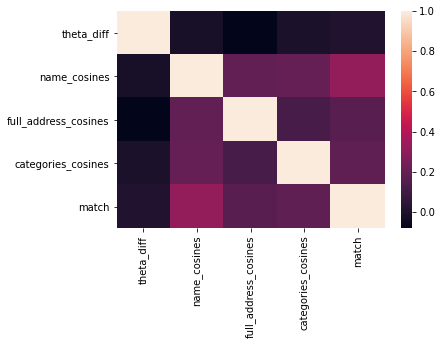

In [62]:
sns.heatmap(pairs_corr)

In [63]:
pairs_corr

,theta_diff,name_cosines,full_address_cosines,categories_cosines,match
theta_diff,1.000000,-0.009203,-0.080235,-0.001742,0.014765
name_cosines,-0.009203,1.000000,0.192721,0.202642,0.318856
full_address_cosines,-0.080235,0.192721,1.000000,0.125937,0.169836
categories_cosines,-0.001742,0.202642,0.125937,1.000000,0.187185
match,0.014765,0.318856,0.169836,0.187185,1.000000


In [64]:
pairs_final_diffed_us['theta_diff'][pairs_final_diffed_us['match']==True].describe()

count    84674.000000
mean         0.002068
std          0.029835
min          0.000000
25%          0.000004
50%          0.000017
75%          0.000124
max          1.556511
Name: theta_diff, dtype: float64

In [65]:
pairs_final_diffed_us['theta_diff'][pairs_final_diffed_us['match']==False].describe()

count    33119.000000
mean         0.001114
std          0.026920
min          0.000000
25%          0.000008
50%          0.000023
75%          0.000069
max          1.563694
Name: theta_diff, dtype: float64

In [67]:
pairs_final_diffed_us.describe()

,theta_diff,name_cosines,full_address_cosines,categories_cosines
count,117793.000000,117793.000000,117793.000000,117793.000000
mean,0.001800,0.649019,0.781899,0.468062
std,0.029048,0.359314,0.218063,0.616417
min,0.000000,0.000000,0.000000,-1.000000
25%,0.000005,0.408248,0.632456,0.000000
50%,0.000019,0.707107,0.816497,0.707107
75%,0.000099,1.000000,1.000000,1.000000
max,1.563694,1.000000,1.000000,1.000000


In [66]:
pairs_final_diffed_us.head()

,theta_diff,name_cosines,full_address_cosines,categories_cosines,match
0,0.000002,0.707107,0.612372,1.0,True
1,0.000082,1.000000,0.534522,-1.0,True
2,0.000019,1.000000,1.000000,1.0,True
3,0.000253,0.816497,1.000000,0.0,False
4,0.000119,0.000000,0.566947,1.0,True


In [68]:
pairs_final_diffed_us.to_csv(r'C:\Users\gorma\OneDrive\Documents\Erdos\foursquare-location-matching\tim_code\working_data\pairs_final_diffed_us.csv')